In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("./data/political_contributions.csv", skipinitialspace=True, usecols=columns)

In [ ]:
data.shape

In [5]:
columns = data.columns.tolist()

In [7]:
data.contb_receipt_amt.sum()

26913394.039999999

In [8]:
total_donations = data.groupby("cand_nm").sum().sort("contb_receipt_amt")

In [9]:
total_donations["contb_receipt_amt"].plot(kind="bar")

In [10]:
%matplotlib inline

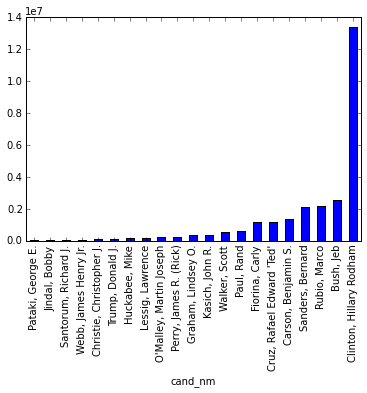

In [11]:
total_donations["contb_receipt_amt"].plot(kind="bar")

In [12]:
mean_donations = data.groupby("cand_nm").mean().sort("contb_receipt_amt")

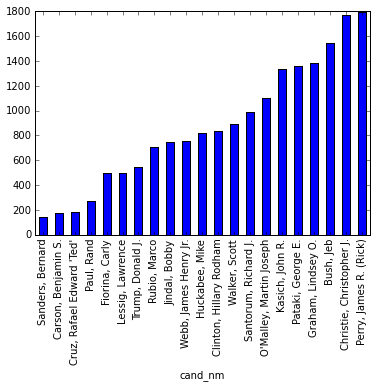

In [13]:
mean_donations["contb_receipt_amt"].plot(kind="bar")

In [14]:
subset = data[["contbr_st", "contbr_occupation", "cand_nm", "contb_receipt_amt"]]

In [15]:
subset.dtypes

contbr_st             object
contbr_occupation     object
cand_nm               object
contb_receipt_amt    float64
dtype: object

In [41]:
c = subset["contbr_st"].astype('category')

In [45]:
subset.loc[:, ("contbr_st")] = c.cat.codes[:]

In [47]:
for column in ["contbr_st", "contbr_occupation", "cand_nm"]:
    subset.loc[:, column] = subset[column].astype('category').cat.codes

In [50]:
subset.contbr_occupation

0        3839
1        2613
2        2613
3        3598
4        2613
5        2613
6        3424
7        2488
8        2613
9        3291
10        264
11        264
12         93
13         93
14         93
15       3424
16       1950
17       3424
18       3424
19       1922
20       1922
21       3606
22       1173
23        534
24       2021
25       3514
26       1922
27       2937
28       2613
29       1349
         ... 
56734    3424
56735    2623
56736    3424
56737    1225
56738    3424
56739    2021
56740    3009
56741    2320
56742    1349
56743    3424
56744    3316
56745    3424
56746    3424
56747    3424
56748    3242
56749    3606
56750    3424
56751    4393
56752    3424
56753    3424
56754    3424
56755    2313
56756    1673
56757    2320
56758    2849
56759    3424
56760    3191
56761    1091
56762    3424
56763    2021
Name: contbr_occupation, dtype: int16

In [51]:
from sklearn.cross_validation import train_test_split

In [53]:
train, test, y_train, y_test = train_test_split(subset[["contbr_st", "contbr_occupation", "cand_nm"]], subset["contb_receipt_amt"], test_size=0.33, random_state=1)

In [55]:
y_test.head()

4164     50
55076    49
54007    40
21948    55
18312    25
Name: contb_receipt_amt, dtype: float64

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

In [58]:
model.fit(train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [60]:
predictions = model.predict(test)

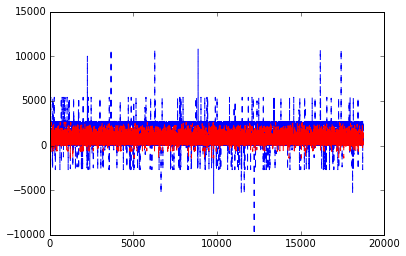

In [70]:
plt.plot(y_test, 'b--')
plt.plot(predictions, 'r--')